In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
(data['Department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [6]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
col = data.columns.to_list()

In [8]:
col.insert(10,col.pop(col.index('left')))

In [9]:
col

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department',
 'salary',
 'left']

In [10]:
data = data[col]

In [11]:
leave=data[data['left']==1]

In [12]:
leave.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years Department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [13]:
low_salary=leave[leave['salary']=="low"]

In [14]:
low_salary['time_spend_company'].value_counts()

3    986
4    541
5    488
6    135
2     22
Name: time_spend_company, dtype: int64

In [15]:
leave.Department.value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: Department, dtype: int64

In [16]:
data.groupby('salary').mean()

satisfaction_level  last_evaluation  number_project  \
salary                                                        
high              0.637470         0.704325        3.767179   
low               0.600753         0.717017        3.799891   
medium            0.621817         0.717322        3.813528   

        average_montly_hours  time_spend_company  Work_accident  \
salary                                                            
high              199.867421            3.692805       0.155214   
low               200.996583            3.438218       0.142154   
medium            201.338349            3.529010       0.145361   

        promotion_last_5years      left  
salary                                   
high                 0.058205  0.066289  
low                  0.009021  0.296884  
medium               0.028079  0.204313

In [17]:

b=[leave.Department.value_counts().tolist()]

In [18]:
print(b)

[[1014, 697, 555, 273, 215, 204, 203, 198, 121, 91]]


In [19]:
a= [data.Department.value_counts().tolist()]

In [20]:
from nltk import flatten

In [21]:
a= flatten(a)
b = flatten(b)

In [22]:
a

[4140, 2720, 2229, 1227, 902, 858, 787, 767, 739, 630]

In [23]:
b

[1014, 697, 555, 273, 215, 204, 203, 198, 121, 91]

In [24]:
c = []

In [25]:
for i in range(len(a)):
    d = a[i]-b[i]
    f=d-a[i]
    j=f/a[i]
    g = j*100
    c.append(g)

In [26]:
c

[-24.492753623188406,
 -25.624999999999996,
 -24.89905787348587,
 -22.249388753056234,
 -23.835920177383592,
 -23.776223776223777,
 -25.794155019059723,
 -25.814863102998697,
 -16.373477672530445,
 -14.444444444444443]

In [27]:
leave_percentage = pd.DataFrame(c)

In [28]:
leave_percentage.sort_values(0)

0
7 -25.814863
6 -25.794155
1 -25.625000
2 -24.899058
0 -24.492754
4 -23.835920
5 -23.776224
3 -22.249389
8 -16.373478
9 -14.444444

In [29]:
leave_percentage['Department']=data.Department.unique()

In [30]:
data.duplicated().sum()

3008

In [31]:
data.drop_duplicates(inplace=True)

In [32]:
data.shape

(11991, 10)

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

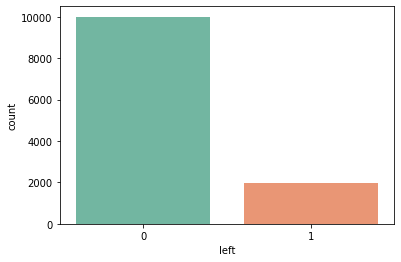

In [33]:
sns.countplot(data.left,palette = "Set2" )

In [34]:
px.histogram(data,data.left,width=400,height=400)

<AxesSubplot:xlabel='salary', ylabel='count'>

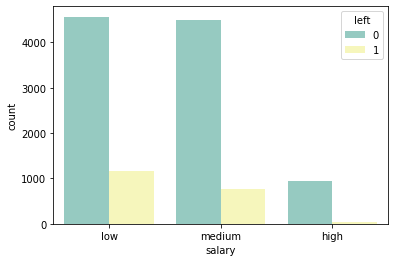

In [35]:
sns.countplot(data= data,x='salary',hue='left',palette='Set3')

In [36]:
data.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  promotion_last_5years Department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1

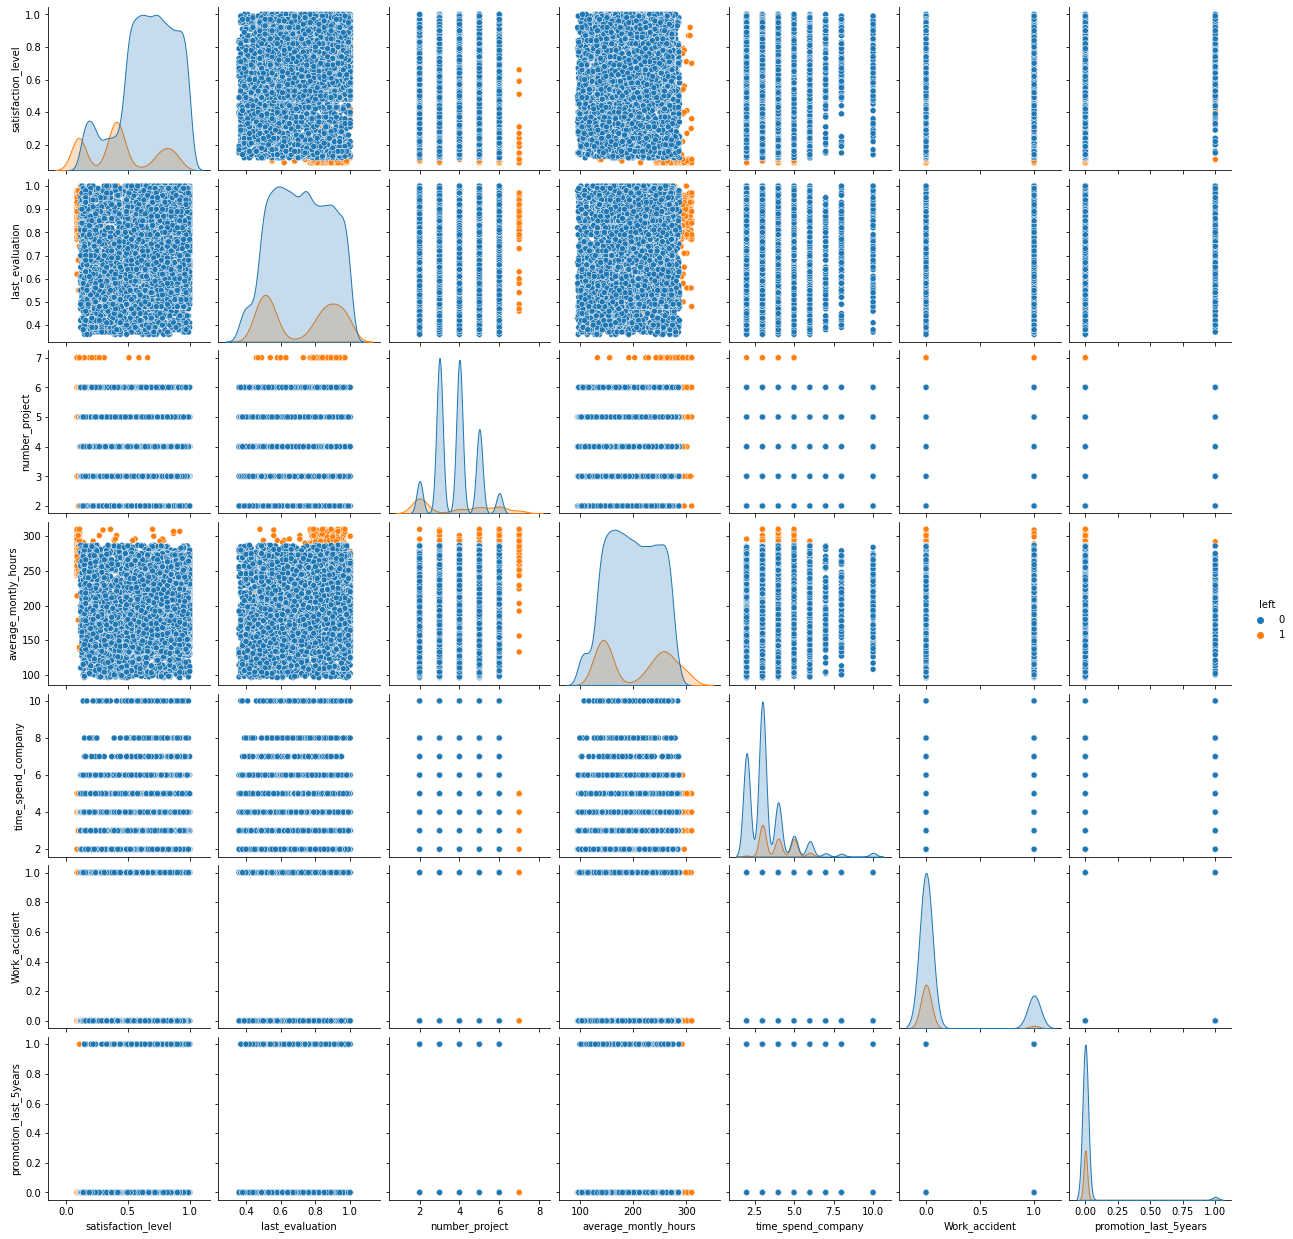

In [37]:
sns.pairplot(data=data,hue='left')

<AxesSubplot:>

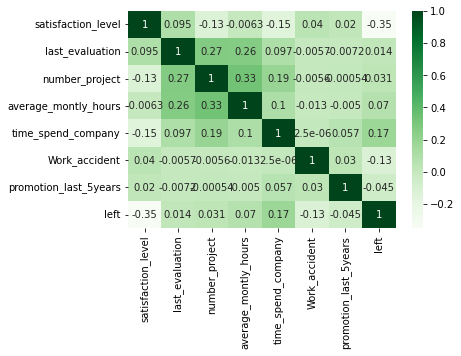

In [38]:
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [39]:
px.imshow(data.corr(),text_auto=True,aspect='auto')

# Data Preprocessing

In [40]:
data=pd.get_dummies(data,columns=['salary'])

In [41]:
col=data.columns.to_list()

In [42]:
col.remove('left')

In [43]:
col.append('left')

In [44]:
data = data[col]

In [45]:
data.duplicated().sum()

0

In [46]:
data.drop_duplicates(inplace=True)

In [47]:
data.duplicated().sum()

0

In [48]:
x =data.drop(columns=['Work_accident','Department','left'])

In [49]:
y =data['left']

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
x = sc.fit_transform(x)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Machine Learning

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [55]:
model = {
    'Random Forest' : RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    
}

In [56]:
accuracy,precision,recall = {},{},{}

In [57]:
for i in model.keys():
    model[i].fit(x_train,y_train)
    y_pred = model[i].predict(x_test)
    
    accuracy[i] = accuracy_score(y_test,y_pred)
    precision[i] = precision_score(y_test,y_pred)

In [58]:
accuracy

{'Random Forest': 0.9808253438932889,
 'Logistic Regression': 0.8274280950395998,
 'Decision Tree': 0.9633180491871614}

In [59]:
precision

{'Random Forest': 0.981029810298103,
 'Logistic Regression': 0.4557823129251701,
 'Decision Tree': 0.8845208845208845}

In [60]:
model_selection  = pd.DataFrame(index=accuracy.keys())

In [61]:
model_selection['Accuracy'],model_selection['Precision'] = accuracy.values(),precision.values()

In [62]:
model_selection

Accuracy  Precision
Random Forest        0.980825   0.981030
Logistic Regression  0.827428   0.455782
Decision Tree        0.963318   0.884521

In [63]:
#Creating Confusion Matrix
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(y_test,y_pred)

In [65]:
cmp = pd.DataFrame(data = cm, columns=['Predicted Not Left','Predicted Left'],index= ['Actual Not Left', 'Actual Left'])

<AxesSubplot:>

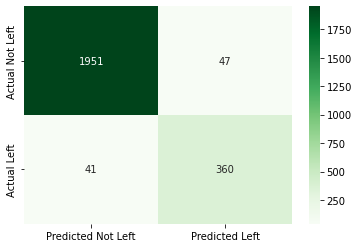

In [66]:
sns.heatmap(cmp,annot=True,fmt='d', cmap="Greens")

In [80]:
random = RandomForestClassifier()

In [81]:
random.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
ypred =random.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred)

0.9624843684868696

In [84]:
precision_score(y_test,y_pred)

0.8765133171912833

In [ ]:
import pickle

In [ ]:
with open('Predictor', 'wb')as f:
    pickle.dump(random,f)